In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/heart_disease3.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
X = df.drop(columns=['num'])
y = df['num']

In [3]:
from sklearn.cluster import KMeans

nrows = y.count()
inertias = []

for i in range(1, 10) :
    kmeans_t = KMeans(n_clusters=i)
    kmeans_t.fit(df)
    inertias.append(kmeans_t.inertia_)

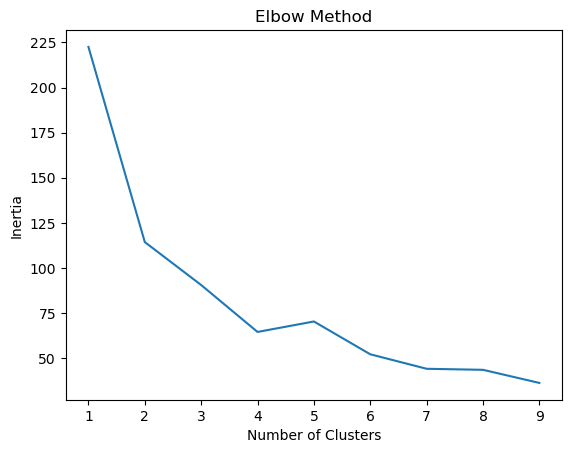

In [4]:
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

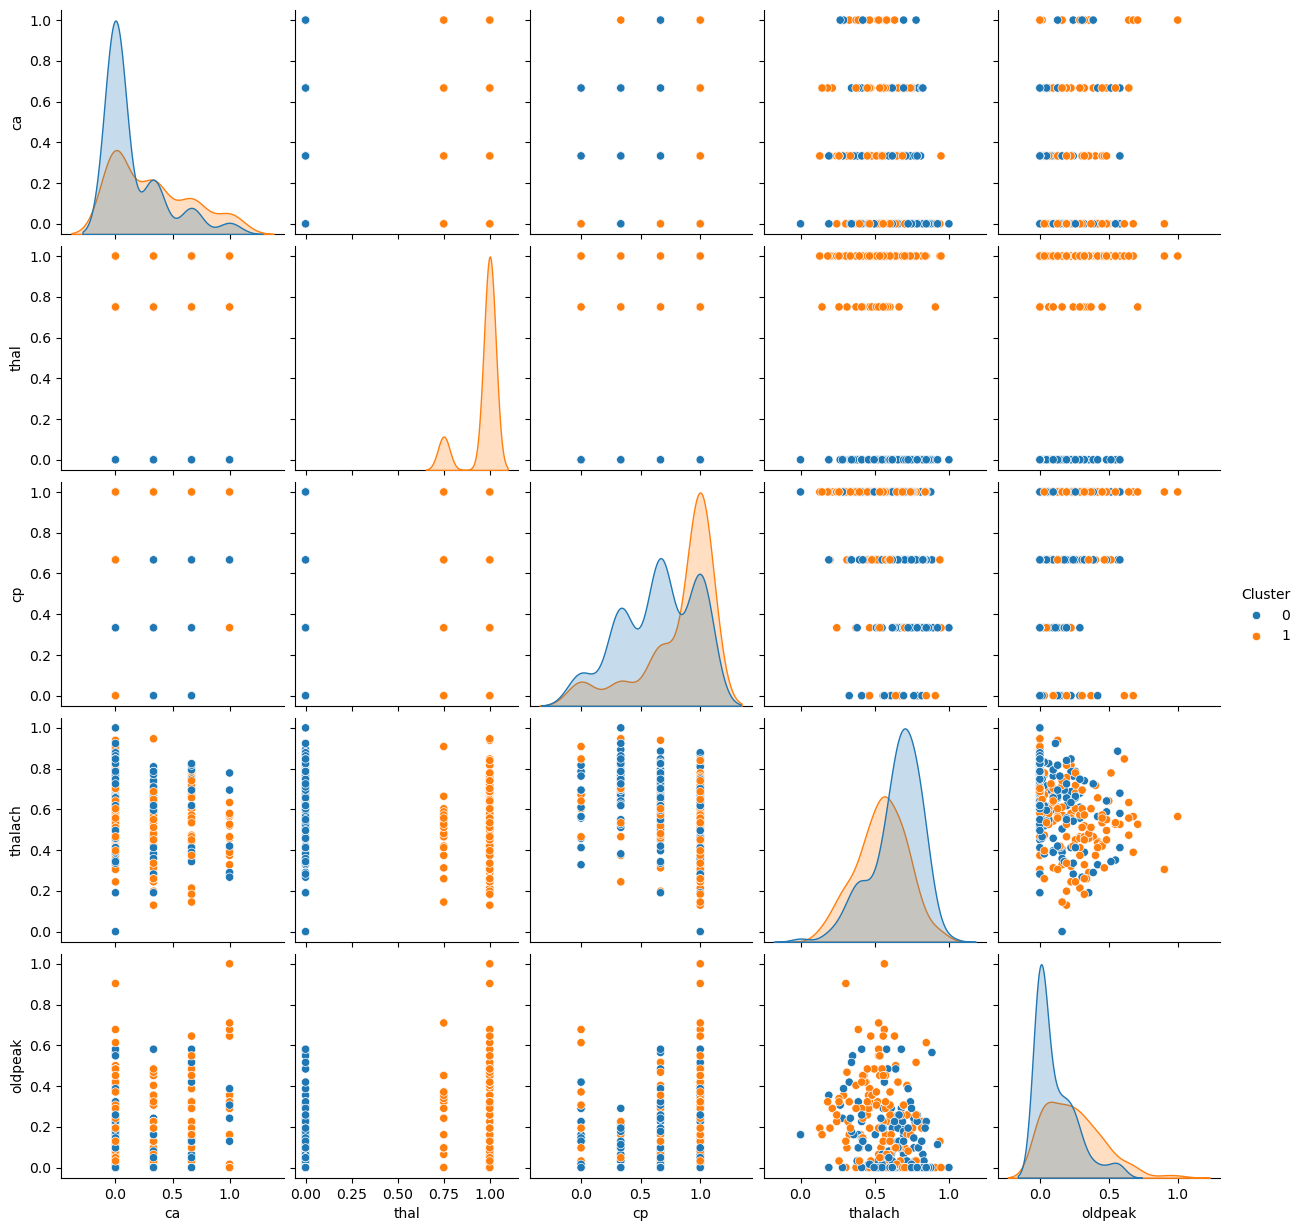

In [5]:
X_kmeans = pd.DataFrame(X)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_kmeans)

X_kmeans['Cluster'] = kmeans.labels_

sns.pairplot(data=X_kmeans, hue='Cluster')

In [6]:
from sklearn.metrics import v_measure_score

y_pred_kmeans = kmeans.predict(X)

with open('../results/evaluation_metrics.txt','a') as f:
    f.write('\t\t\tK Means V Measure Score\n\n')
    f.write(str(v_measure_score(y_pred_kmeans, y)) + '\n')

print(v_measure_score(y_pred_kmeans, y))

0.2096501040553294


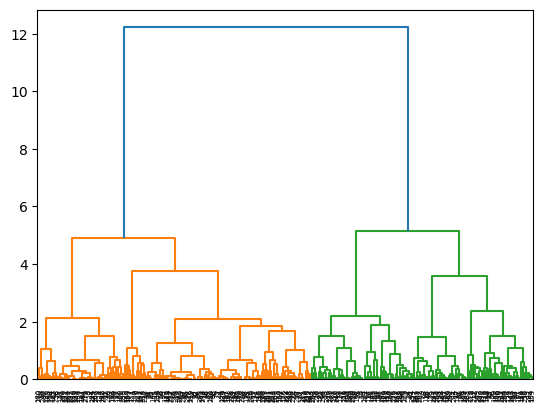

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(X, method='ward')
dendrogram(linked)
plt.show()